In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
Loan_train=pd.read_csv('D:\\Data Science Practice\\ML Hiring\\train.csv')

In [3]:
Loan_test=pd.read_csv('D:\\Data Science Practice\\ML Hiring\\test.csv')

In [4]:
Loan_test['m13']=np.NaN

In [5]:
Loan_test.origination_date=pd.to_datetime(Loan_test.origination_date,format='%d/%m/%y')

In [6]:
Loan=pd.concat([Loan_train,Loan_test],axis=0)

In [7]:
Loan.shape

(151924, 29)

In [8]:
Loan.isnull().sum()

loan_id                         0
source                          0
financial_institution           0
interest_rate                   0
unpaid_principal_bal            0
loan_term                       0
origination_date                0
first_payment_date              0
loan_to_value                   0
number_of_borrowers             0
debt_to_income_ratio            0
borrower_credit_score           0
loan_purpose                    0
insurance_percent               0
co-borrower_credit_score        0
insurance_type                  0
m1                              0
m2                              0
m3                              0
m4                              0
m5                              0
m6                              0
m7                              0
m8                              0
m9                              0
m10                             0
m11                             0
m12                             0
m13                         35866
dtype: int64

In [9]:
Loan.nunique()

loan_id                     151924
source                           3
financial_institution           19
interest_rate                 1121
unpaid_principal_bal           660
loan_term                      149
origination_date                 6
first_payment_date               8
loan_to_value                   93
number_of_borrowers              2
debt_to_income_ratio            58
borrower_credit_score          223
loan_purpose                     3
insurance_percent               14
co-borrower_credit_score       216
insurance_type                   2
m1                               4
m2                               5
m3                               6
m4                               7
m5                               8
m6                               9
m7                              10
m8                              10
m9                              11
m10                             12
m11                             13
m12                             13
m13                 

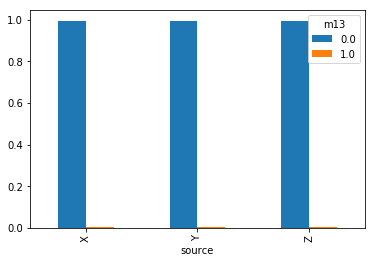

In [10]:
pd.crosstab(Loan.source,Loan.m13,normalize='index').plot(kind='bar')

In [11]:
Loan=pd.concat([Loan,pd.get_dummies(Loan.source,prefix='source',prefix_sep='_',drop_first=True)],axis=1).drop('source',axis=1)

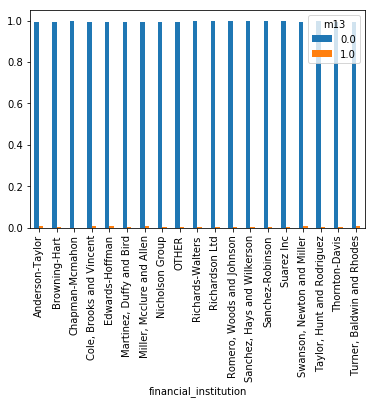

In [12]:
pd.crosstab((Loan.financial_institution),Loan.m13,normalize='index').plot(kind='bar')

In [13]:
Loan=Loan.drop('financial_institution',axis=1)

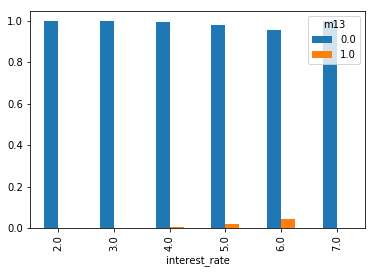

In [14]:
pd.crosstab(np.round(Loan.interest_rate),Loan.m13,normalize='index').plot(kind='bar')

In [15]:
Loan.interest_rate=np.where(Loan.interest_rate>5,1,2)

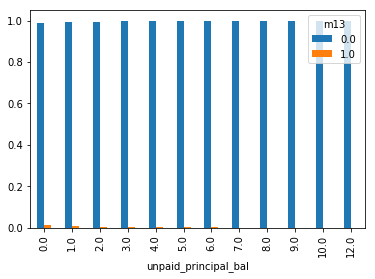

In [16]:
pd.crosstab(np.round(Loan.unpaid_principal_bal/100000),Loan.m13,normalize='index').plot(kind='bar')

In [17]:
Loan.unpaid_principal_bal=np.where(Loan.unpaid_principal_bal>600000,1,2)

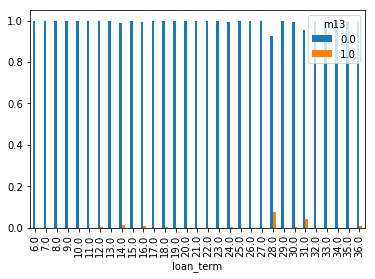

In [18]:
pd.crosstab(np.round(Loan.loan_term/10),Loan.m13,normalize='index').plot(kind='bar')

In [19]:
Loan.loan_term=np.where((Loan.loan_term>0) & (Loan.loan_term <= 120),1,np.where((Loan.loan_term>120) & (Loan.loan_term<= 240),2,3))

In [20]:
Loan=pd.concat([Loan,pd.get_dummies(Loan.loan_term,prefix='loan_term',prefix_sep='_',drop_first=True)],axis=1).drop('loan_term',axis=1)

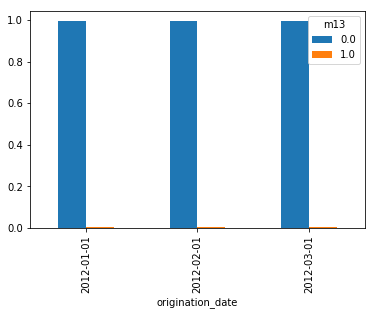

In [21]:
pd.crosstab(Loan.origination_date,Loan.m13,normalize='index').plot(kind='bar')

In [22]:
Loan.origination_date=pd.to_datetime(Loan.origination_date)

In [23]:
Loan.origination_date=Loan.origination_date.astype(str).str[6:7]

In [24]:
Loan.first_payment_date

0        05/2012
1        03/2012
2        03/2012
3        04/2012
4        04/2012
5        04/2012
6        04/2012
7        03/2012
8        05/2012
9        03/2012
10       04/2012
11       03/2012
12       05/2012
13       03/2012
14       04/2012
15       03/2012
16       04/2012
17       04/2012
18       03/2012
19       04/2012
20       04/2012
21       04/2012
22       03/2012
23       03/2012
24       03/2012
25       04/2012
26       04/2012
27       04/2012
28       04/2012
29       03/2012
          ...   
35836     Apr-12
35837     Mar-12
35838     Apr-12
35839     Apr-12
35840     Apr-12
35841     Mar-12
35842     Mar-12
35843     Apr-12
35844     Apr-12
35845     Mar-12
35846     Mar-12
35847     Apr-12
35848     Mar-12
35849     Apr-12
35850     Mar-12
35851     Mar-12
35852     Apr-12
35853     Apr-12
35854     Mar-12
35855     Apr-12
35856     Mar-12
35857     May-12
35858     Apr-12
35859     Mar-12
35860     Apr-12
35861     Apr-12
35862     Mar-12
35863     Apr-

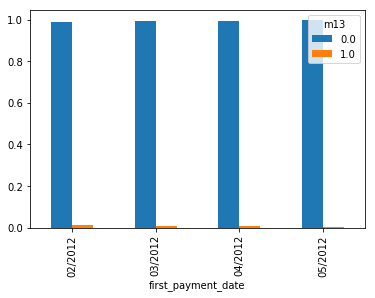

In [25]:
pd.crosstab(Loan.first_payment_date,Loan.m13,normalize='index').plot(kind='bar')

In [26]:
Loan.drop(["origination_date","first_payment_date"],axis=1,inplace=True)


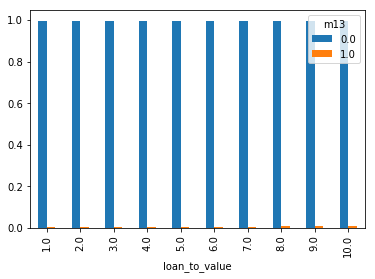

In [27]:
pd.crosstab(np.round(Loan.loan_to_value/10) ,Loan.m13,normalize='index').plot(kind='bar')

In [28]:
Loan.drop('loan_to_value',axis=1,inplace=True)

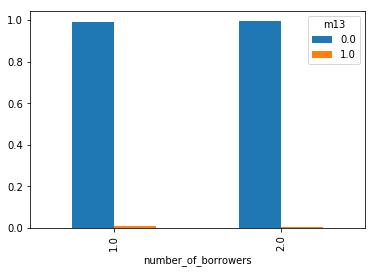

In [29]:
pd.crosstab(Loan.number_of_borrowers,Loan.m13,normalize='index').plot(kind='bar')

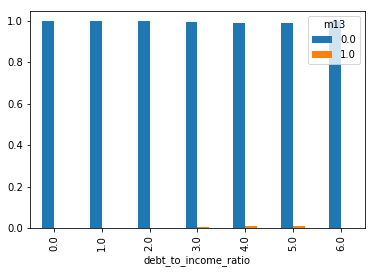

In [30]:
pd.crosstab(np.round(Loan.debt_to_income_ratio/10),Loan.m13,normalize='index').plot(kind='bar')

In [31]:
Loan.drop(["debt_to_income_ratio","number_of_borrowers"],axis=1,inplace=True)

In [32]:
Loan['Credit_score']=(Loan.borrower_credit_score+Loan['co-borrower_credit_score'])/2

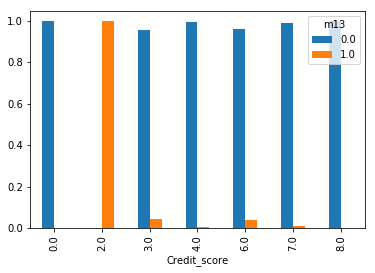

In [33]:
pd.crosstab(np.round(Loan.Credit_score/100),Loan.m13,normalize='index').plot(kind='bar')

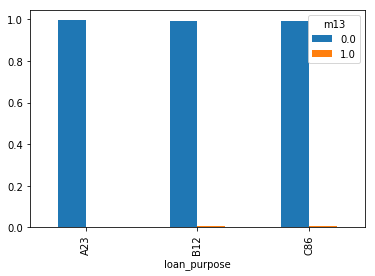

In [34]:
pd.crosstab(Loan.loan_purpose,Loan.m13,normalize='index').plot(kind='bar')

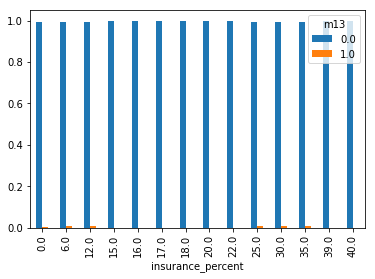

In [35]:
pd.crosstab(Loan.insurance_percent,Loan.m13,normalize='index').plot(kind='bar')

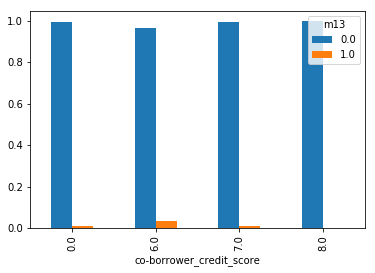

In [36]:
pd.crosstab(np.round(Loan['co-borrower_credit_score']/100),Loan.m13,normalize='index').plot(kind='bar')

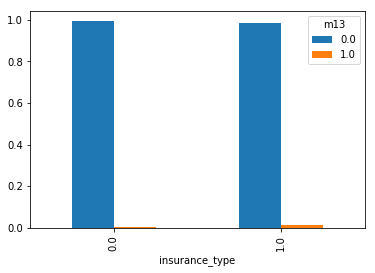

In [37]:
pd.crosstab(Loan['insurance_type'],Loan.m13,normalize='index').plot(kind='bar')

In [38]:
Loan.drop(["loan_purpose","insurance_percent","insurance_type"],axis=1,inplace=True)
#Loan.drop(["loan_purpose"],axis=1,inplace=True)

In [39]:
Loan['m']=Loan.m1+Loan.m2+Loan.m3+Loan.m4+Loan.m5+Loan.m6+Loan.m7+Loan.m8+Loan.m9+Loan.m10+Loan.m11+Loan.m12

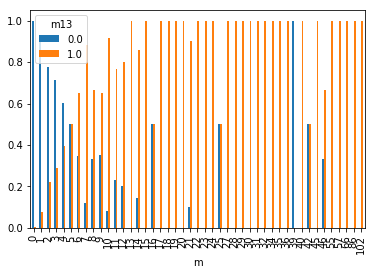

In [40]:
pd.crosstab(Loan['m'],Loan.m13,normalize='index').plot(kind='bar')

In [41]:
#Loan.drop(['m1','m2', 'm3','m4','m5','m6','m7','m8','m9','m10','m11','m12'],axis=1,inplace=True)

In [42]:
Loan.dtypes

loan_id                       int64
interest_rate                 int32
unpaid_principal_bal          int32
borrower_credit_score       float64
co-borrower_credit_score    float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                         float64
source_Y                      uint8
source_Z                      uint8
loan_term_2                   uint8
loan_term_3                   uint8
Credit_score                float64
m                             int64
dtype: object

In [43]:
Loan.drop(["borrower_credit_score","co-borrower_credit_score"],axis=1,inplace=True)

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [46]:
x_train=Loan.loc[~Loan.m13.isnull(),: ].drop(["loan_id",'m13'],axis=1)
y_train=Loan.loc[~Loan.m13.isnull(),'m13']

In [47]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[1,3,10],
                "max_depth": [3,4,5,6,8,10,12,15,20,21,22,23],
                "min_child_weight":[0.1,0.3,0.5],
                "max_delta_step":[10,11,12,13,14,15],
                "subsample":[0.6,0.7,0.8],
                "colsample_bytree":[0.2,0.3,0.4,0.5,0.6],
                "colsample_bylevel":[0.8,0.7,0.9],
                "reg_lambda":[0.1,0.2,0.05], 
                "reg_alpha":[1e-8, 1e-7, 1e-6,1e-5],
                "scale_pos_weight":[6,7,8,9],
                "n_estimators":[65,100,200,300,500,1000]
             }


In [48]:
from xgboost.sklearn import XGBClassifier

In [49]:
xgb=XGBClassifier()

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
params={'n_estimators':[100,200,300],
       'learning_rate':[0.01,0.05,0.02,0.03],
        'max_features':[4,6,8,10],
        'subsample':[0.6,0.8,1.0],
       'max_depth':[None,5,6,7,8,9,10,12,14,16,18,20]}

In [52]:
gbm=GradientBoostingClassifier()

In [53]:
random_search=RandomizedSearchCV(gbm,param_distributions=params,cv=3,n_iter=10,scoring='roc_auc',n_jobs=-1)

In [54]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.02, 0.03], 'max_features': [4, 6, 8, 10], 'subsample': [0.6, 0.8, 1.0], 'max_depth': [None, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [56]:
random=RandomizedSearchCV(xgb,param_distributions=xgb_params,cv=3,n_iter=5,scoring='roc_auc',n_jobs=-1)

In [57]:
random.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'gamma': [1, 3, 10], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15, 20, 21, 22, 23], 'min_child_weight': [0.1, 0.3, 0.5], 'max_delta_step': [10, 11, 12, 13, 14, 15], 'subsample': [0.6, 0.7, 0.8], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6], 'colsample_bylevel': [0.8, 0.7, 0.9], 'reg_lambda': [0.1, 0.2, 0.05], 'reg_alpha': [1e-08, 1e-07, 1e-06, 1e-05], 'scale

In [58]:
train_score=random.predict_proba(x_train)[:,1]

In [59]:
real=y_train

In [60]:
cutoffs=np.linspace(0.01,0.99,99)
cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [61]:
ks_all=[]
for cutoff in cutoffs:
    predicted=(train_score>cutoff).astype(int)
    
    TP=((predicted==1) & (real==1)).sum()
    FP=((predicted==1) & (real==0)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    
    P=TP+FN
    N=TN+FP
    
    KS=(TN/N)-(FN/P)
    ks_all.append(KS)
    

In [62]:
d=pd.DataFrame({"KS":list((ks_all)),"cutoffs":list((cutoffs))})

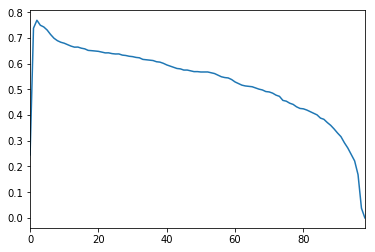

In [63]:
d["KS"].plot()

In [64]:
d.loc[d.KS==max(d.KS),:]

,KS,cutoffs
2,0.768705,0.03


In [65]:
Loan.drop('predict',axis=1,inplace=True)

KeyError: "['predict'] not found in axis"

In [66]:
Loan['predict']=random.predict_proba(Loan.drop(['m13','loan_id'], axis=1))[:,1]

In [67]:
Loans=Loan.loc[Loan.m13.isnull(),['loan_id','predict']]

In [69]:
Loans

,loan_id,predict
0,1,0.020970
1,2,0.010567
2,3,0.021351
3,4,0.008017
4,5,0.009688
5,6,0.010528
6,7,0.015689
7,8,0.012330
8,9,0.008068
9,10,0.016006


In [70]:
Loans.columns=['loan_id','m13']

In [71]:
Loans.m13=(Loans.m13>0.33).astype(int)

In [72]:
Loans.m13=Loans.m13.astype(int)

In [73]:
Loans.to_csv('loan.csv',index=False)

In [74]:
Loans.m13.value_counts()

0    35648
1      218
Name: m13, dtype: int64

rfecv
from imblearn.over_sampling import SMOTE
Relationship with Numerical Variables : Description, Skewness, Kurtosis, Histograms, Boxplots(relationship with m13), Correlation Matrix

If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],range(10)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2)))
    
for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],AX):
    sns.boxplot(x = 'm13', y = i, data =numerical_features,ax=j)
    

df['financial_institution_new'] = df['financial_institution'].apply(lambda x: 1 if (x == 'Browning-Hart') or (x == 'Others') else 0)
df['source_new'] = df['source'].apply(lambda x: 1 if (x == 'X') or (x == 'Y') else 0)
print(df['financial_institution_new'].value_counts())
print(df['source_new'].value_counts())